**PROBLEM 01**
Use the following dataset given below.

1. Measure the prediction score using the default n_estimators(10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees
3. Perform the K-fold cross validation to measure the performance of Random Forest algorithm.

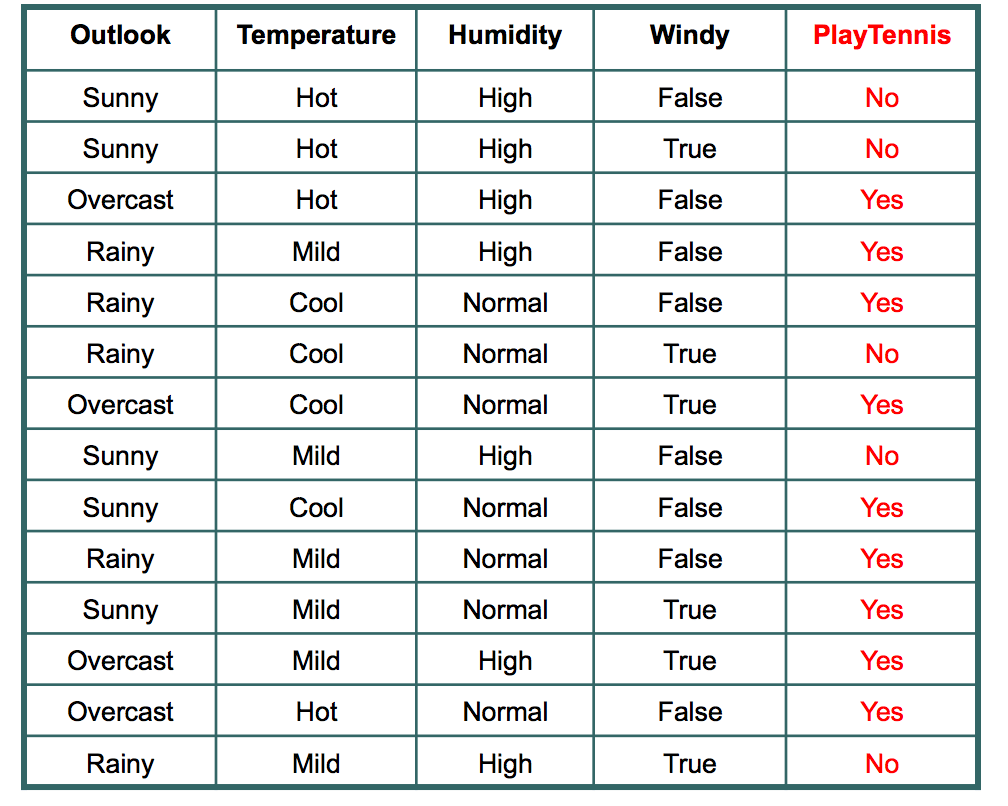

In [56]:
# PROBLEM 01 code starts here
import pandas as pd
import numpy as np

In [87]:
data = {'outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
        , 'Temperature': ['Hot', 'Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild', 'Hot','Mild']
        , 'Humidity':['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High']
        , 'Windy':[False,True,False,False,False,True,True,False,False,False,True,True,False,True]
        , 'PlayTennis':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}  
tennis_df = pd.DataFrame(data) 
tennis_df.head()

,outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [90]:
tennis_df = pd.get_dummies(tennis_df, columns=['outlook', 'Temperature', 'Humidity', 'Windy'])
tennis_df

,PlayTennis,outlook_Overcast,outlook_Rainy,outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,No,0,0,1,0,1,0,1,0,1,0
1,No,0,0,1,0,1,0,1,0,0,1
2,Yes,1,0,0,0,1,0,1,0,1,0
3,Yes,0,1,0,0,0,1,1,0,1,0
4,Yes,0,1,0,1,0,0,0,1,1,0
5,No,0,1,0,1,0,0,0,1,0,1
6,Yes,1,0,0,1,0,0,0,1,0,1
7,No,0,0,1,0,0,1,1,0,1,0
8,Yes,0,0,1,1,0,0,0,1,1,0
9,Yes,0,1,0,0,0,1,0,1,1,0


In [91]:
from sklearn.preprocessing import LabelEncoder
le_play = LabelEncoder()

tennis_df['PlayTennis'] = le_play.fit_transform(tennis_df['PlayTennis'])

tennis_df

,PlayTennis,outlook_Overcast,outlook_Rainy,outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,0,0,0,1,0,1,0,1,0,1,0
1,0,0,0,1,0,1,0,1,0,0,1
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,0,0,1,1,0,1,0
4,1,0,1,0,1,0,0,0,1,1,0
5,0,0,1,0,1,0,0,0,1,0,1
6,1,1,0,0,1,0,0,0,1,0,1
7,0,0,0,1,0,0,1,1,0,1,0
8,1,0,0,1,1,0,0,0,1,1,0
9,1,0,1,0,0,0,1,0,1,1,0


In [96]:
x_train,x_test,y_train,y_test = train_test_split(tennis_df,tennis_df.PlayTennis, test_size = 0.3)

In [97]:
rf = RandomForestClassifier(n_estimators= 10)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8

In [98]:
rf1 = RandomForestClassifier(n_estimators= 20)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

1.0

In [99]:
rf2 = RandomForestClassifier(n_estimators= 30)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8

In [100]:
rf3 = RandomForestClassifier(n_estimators= 40)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

1.0

In [101]:
rf4 = RandomForestClassifier(n_estimators= 100)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [113]:
X = tennis_df
y = tennis_df.PlayTennis
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 11, Test set:3
Fold:2, Train set: 11, Test set:3
Fold:3, Train set: 11, Test set:3
Fold:4, Train set: 11, Test set:3
Fold:5, Train set: 12, Test set:2


In [117]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [118]:
estimators = [10,20,30,40]
for count in estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators=count), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'Scores for each fold are: {score}')
    rmse(score.mean())

Scores for each fold are: [-0.         -0.33333333 -0.         -0.         -0.        ]
rmse= 0.26


In [120]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 0.26
For estimators: 100
rmse= 0.26
For estimators: 150
rmse= 0.26
For estimators: 200
rmse= 0.26
For estimators: 250
rmse= 0.26
For estimators: 300
rmse= 0.26
For estimators: 350
rmse= 0.26
